<a href="https://colab.research.google.com/github/IsaacNewtonVII/HDSC_StageE/blob/main/Time_Series_Analysis_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install prophet model
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639120 sha256=449c99d0c977ff1bf4c068dbd43cc541226e0c8bb38f4ec5e72be5dbd100f283
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [3]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#import the dataset
df = pd.read_csv('/content/drive/MyDrive/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [6]:
#confirming the shape of the dataset
df.shape

(92016, 5)

In [7]:
#checking for null values
# df.isnull().values.any()
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [9]:
#converting the FullDate column to a datetime type
df['FullDate'] = pd.to_datetime(df['FullDate'])
#changing the index to the date column since this is a time series analysis
df.set_index('FullDate', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [11]:
#downsampling from hourly to daily sampling rate
df_daily = df.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


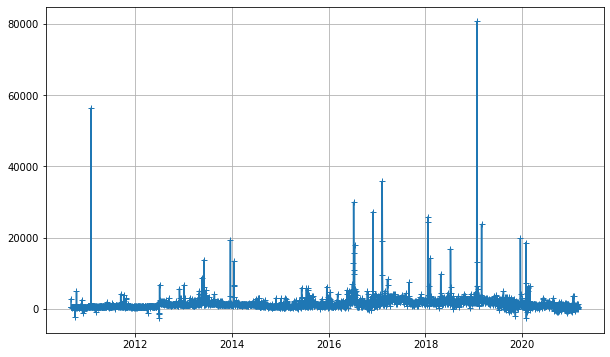

In [12]:
#plot of ElecPrice over time 
plt.figure(figsize = (10,6))
plt.plot(df_daily.ElecPrice, marker = '+',)
plt.grid()
#df_daily["ElecPrice"].plot()

In [13]:
#using the augmented dicky fuller test, what is the p-value of the sysload and gasprice of the resampled data
from statsmodels.tsa.stattools import adfuller
pval_sys = adfuller(df_daily['SysLoad'])
pval_gas = adfuller(df_daily['GasPrice'])
print(f'p_val for sysload : {np.round(pval_sys[1], 6)}')
print(f'p_val for gasprice: {np.round(pval_gas[1], 6)}')

p_val for sysload : 0.004254
p_val for gasprice: 0.045027


In [14]:
#using the augmented dicky fuller test, what are the 10% and 5% critical value of GasPrice and ElecPrice 

# print(f'the critical values are:')
# for key, value in pval_gas[4].items():
#   print(f'{key}: {value}')

pval_elec = adfuller(df_daily['ElecPrice'])
# print('the critical values are:')
# for key, value in pval_elec[4].items():
#   print(f'{key}: {value}')

print('gasprice 10% critical:', round(pval_gas[4]['10%'], 4))
print('elecprice 5% critical:',round(pval_elec[4]['5%'], 4))



gasprice 10% critical: -2.5672
elecprice 5% critical: -2.8623


In [15]:
#preparing to train the univariate time serie model with Facebook Prophet 
df_daily.head(1)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.7


In [16]:
#reseting the index as the date column will be used for this training
df_daily.reset_index(inplace=True)

In [17]:
#renaming columns as specified
df_daily = df_daily.rename(columns={'FullDate':'ds','ElecPrice':'y'})
df_daily.head(2)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [18]:
df_daily.shape

(3834, 5)

In [19]:
#divide data into a train and test set
# where x = len(df_daily)
train = df_daily.iloc[:2757,:]
test = df_daily.iloc[2757:,:]

#confirming that both datasets are equal
print(len(df_daily))
print(len(train)+ len(test))

3834
3834


In [20]:
#Training model
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
pred = model.predict(test)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,127.398096,4991.432338,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,136.122212,4957.450545,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,375.349677,5167.243344,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,299.765040,5094.001254,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-191.888305,4605.322500,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3567.126543,343.279533,6564.298282,1900.721090,5376.489216,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
1073,2021-02-25,3567.943112,736.252239,6489.617549,1898.031304,5379.585262,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
1074,2021-02-26,3568.759681,508.363467,6253.324966,1895.018161,5382.681307,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
1075,2021-02-27,3569.576250,26.018791,6003.485067,1891.935958,5385.777353,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


In [22]:
#evaluating the mean absolute percentage error
def mape(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return np.mean(np.abs((y-yhat)/y))*100
pred = model.predict(test)
MAPE = mape(test["y"],pred["yhat"])
round(MAPE, 2)

549.48

In [23]:
#the root mean squared error in 2 d.p
def rmse(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return round(np.sqrt(np.mean(np.square(y-yhat))),2)
print(rmse(test["y"], pred["yhat"]))

3218.16


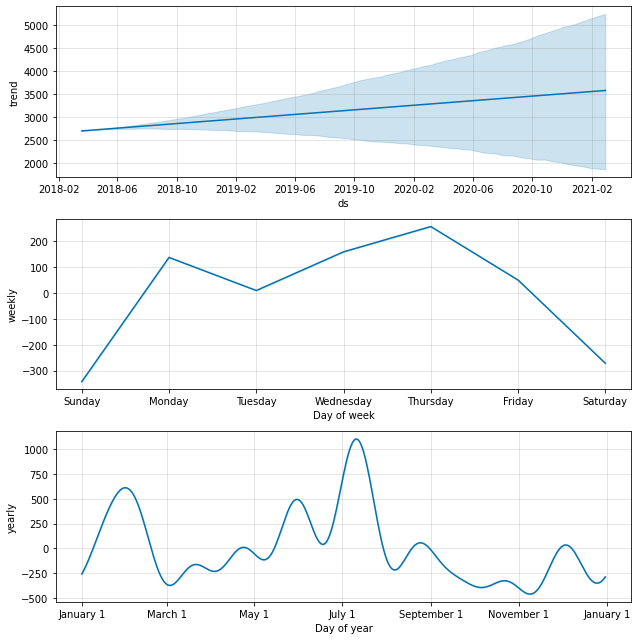

In [24]:
#plotting the components from the forecasted  model
#what month of the yearly seasonality has the highest value ?
model.plot_components(pred)
plt.show()

In [25]:
#Training new prophet model with multiple predictors
df_daily2 = df_daily.rename(columns={'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3'})
df_daily2.head()



,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [26]:
#divide data into a train and test set
# where x = len(df_daily2)
re_train = df_daily2.iloc[:2757,:]
re_test = df_daily2.iloc[2757:,:]

#confirming that both datasets are equal
print(len(df_daily2))
print(len(re_train)+ len(re_test))

3834
3834


In [27]:
#multivariate forecast model using three predictors
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
#training the model
model2.fit(re_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
pred2 = model2.predict(re_test)
pred2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.664112,-234.756764,4268.313252,1866.664112,1866.664112,-856.577763,-856.577763,-856.577763,0.237860,...,-84.512848,-84.512848,-84.512848,-39.104444,-39.104444,-39.104444,0.0,0.0,0.0,1985.365644
1,2018-03-21,1867.349885,-177.928165,4231.739600,1867.349885,1867.349885,-1026.630461,-1026.630461,-1026.630461,0.235038,...,42.515562,42.515562,42.515562,-29.837843,-29.837843,-29.837843,0.0,0.0,0.0,1976.703318
2,2018-03-22,1868.035658,742.071210,5041.703453,1868.035658,1868.035658,-215.009060,-215.009060,-215.009060,0.221364,...,145.604343,145.604343,145.604343,-24.826777,-24.826777,-24.826777,0.0,0.0,0.0,2897.096666
3,2018-03-23,1868.721432,266.421111,4656.994885,1868.721432,1868.721432,-274.961329,-274.961329,-274.961329,0.213332,...,-44.332801,-44.332801,-44.332801,-23.929622,-23.929622,-23.929622,0.0,0.0,0.0,2581.305545
4,2018-03-24,1869.407205,-743.025931,3818.946170,1869.407205,1869.407205,-1076.687360,-1076.687360,-1076.687360,0.211379,...,-117.513591,-117.513591,-117.513591,-26.895380,-26.895380,-26.895380,0.0,0.0,0.0,1434.385996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,2601.813038,-1498.555161,3234.340911,1827.866342,3374.030603,-1372.659217,-1372.659217,-1372.659217,0.238077,...,42.515562,42.515562,42.515562,-433.640690,-433.640690,-433.640690,0.0,0.0,0.0,953.579564
1073,2021-02-25,2602.498811,-1118.819553,3579.141802,1827.527395,3375.813023,-1033.288529,-1033.288529,-1033.288529,0.239814,...,145.604343,145.604343,145.604343,-460.064407,-460.064407,-460.064407,0.0,0.0,0.0,1313.293701
1074,2021-02-26,2603.184585,-953.818369,3712.854912,1827.188449,3377.595443,-754.725135,-754.725135,-754.725135,0.237209,...,-44.332801,-44.332801,-44.332801,-480.717736,-480.717736,-480.717736,0.0,0.0,0.0,1377.207811
1075,2021-02-27,2603.870358,-1239.612555,3360.505780,1826.849502,3379.377863,-1011.251585,-1011.251585,-1011.251585,0.235689,...,-117.513591,-117.513591,-117.513591,-495.363274,-495.363274,-495.363274,0.0,0.0,0.0,1032.064004


In [31]:
#evaluating the MAPE
MAPE = mape(re_test["y"],pred2["yhat"])
round(MAPE, 2)

231.28

In [30]:
#the root mean squared error 
print(rmse(re_test["y"], pred2["yhat"]))

2706.92


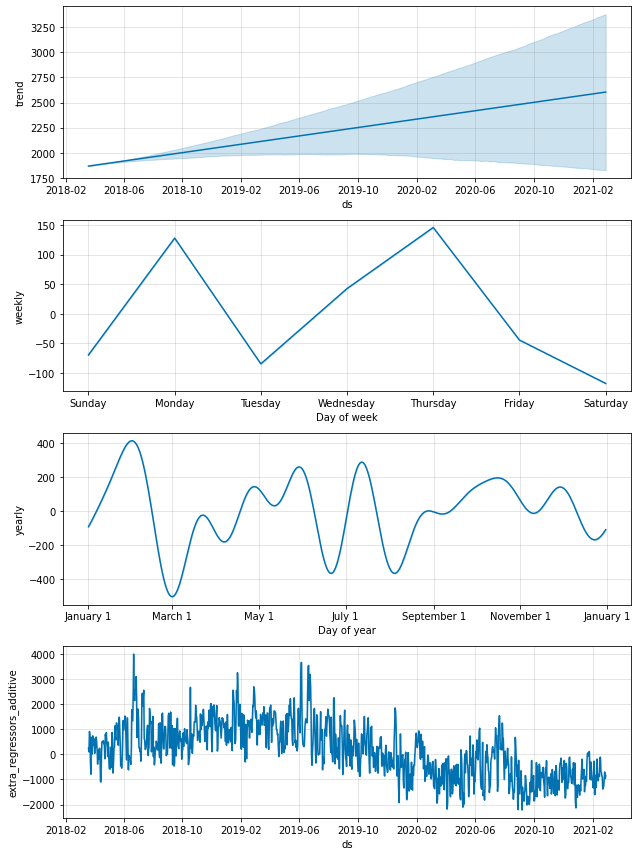

In [33]:
#plotting the components from the multivariate forecasted model
#which day of the daily seasonality has the highest value?
model2.plot_components(pred2)
plt.show()

In [35]:
#Training model and excluding predictor 'add2'(Tmax)
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add3')

#training the model
model3= model.fit(re_train)

#make predictions on testdata
pred3 =model3.predict(re_test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
#evaluating mape
MAPE = mape(re_test["y"],pred3["yhat"])
round(MAPE, 2)

233.72